## importation des bibliotheques 

In [48]:
import numpy as np
import pandas as pd
from PIL import Image
from io import BytesIO

import webcolors

import matplotlib.pyplot as plt
from importlib import reload

from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler 


## affichage de l'image

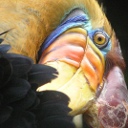

In [47]:
image = Image.open("bird_small.png")
image

In [50]:
X = np.array(image.getdata())
image_pixels = X.reshape(*image.size, -1)
image_pixels.shape
X

array([[219, 180, 103],
       [230, 185, 116],
       [226, 186, 110],
       ...,
       [ 65,  43,  39],
       [ 58,  37,  38],
       [ 52,  39,  34]])

##  convertir en image PIL et calcule la taille en kilooctets de l'image 

In [35]:
def imageByteSize(img):
    img_file = BytesIO()
    image = Image.fromarray(np.uint8(img))
    image.save(img_file, 'png')
    return img_file.tell()/1024
img_size = imageByteSize(image)
img_n_colors = len(set(image.getdata())) #extraire le nombre de couleur de l'image initial 
img_n_colors

13930

In [17]:
img_total_variance = sum(np.linalg.norm(X - np.mean(X, axis = 0), axis = 1)**2)
img_total_variance
    

262613802.19939813

In [42]:
kmeans = KMeans(n_clusters = 16,
                random_state = 123).fit(X)
kmeans_df = pd.DataFrame(kmeans.cluster_centers_, columns = ['Red', 'Green', 'Blue'])
kmeans_df

C:\Users\latifa\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


,Red,Green,Blue
0,248.730946,241.103765,209.056933
1,68.560345,60.468391,57.336207
2,172.535354,154.898990,140.136925
3,220.672566,183.421829,117.965782
4,143.372530,119.647233,105.521739
5,20.949983,22.694073,20.057211
6,171.471446,123.134872,53.529769
7,146.262295,185.188525,221.967213
8,193.239662,155.472744,88.691729
9,246.071146,219.612648,162.095850


In [19]:
def closest_colour(requested_colour):
    min_colours = {}
    for key, name in webcolors.CSS3_HEX_TO_NAMES.items():
        r_c, g_c, b_c = webcolors.hex_to_rgb(key)
        rd = (r_c - requested_colour[0]) ** 2
        gd = (g_c - requested_colour[1]) ** 2
        bd = (b_c - requested_colour[2]) ** 2
        min_colours[(rd + gd + bd)] = name
    return min_colours[min(min_colours.keys())]
def get_colour_name(requested_colour):
    try:
        closest_name = actual_name = webcolors.rgb_to_name(requested_colour)
    except ValueError:
        closest_name = closest_colour(requested_colour)
    return closest_name
kmeans_df["Color Name"] = list(map(get_colour_name, np.uint8(kmeans.cluster_centers_)))
kmeans_df

,Red,Green,Blue,Color Name
0,248.730946,241.103765,209.056933,papayawhip
1,68.560345,60.468391,57.336207,darkslategray
2,172.535354,154.898990,140.136925,rosybrown
3,220.672566,183.421829,117.965782,burlywood
4,143.372530,119.647233,105.521739,gray
5,20.949983,22.694073,20.057211,black
6,171.471446,123.134872,53.529769,peru
7,146.262295,185.188525,221.967213,skyblue
8,193.239662,155.472744,88.691729,darkkhaki
9,246.071146,219.612648,162.095850,navajowhite


In [36]:
def replaceWithCentroid(kmeans):
    new_pixels = []
    for label in kmeans.labels_:
        pixel_as_centroid = list(kmeans.cluster_centers_[label])
        new_pixels.append(pixel_as_centroid)
    new_pixels = np.array(new_pixels).reshape(*image.size, -1)
    return new_pixels
new_pixels = replaceWithCentroid(kmeans)

In [41]:
image_final=np.array(new_pixels / 255).reshape(*new_pixels.shape)
nbr_c_img_final=len(np.unique(image_final.reshape(-1, image_final.shape[-1]), axis=0))
nbr_c_img_final

16

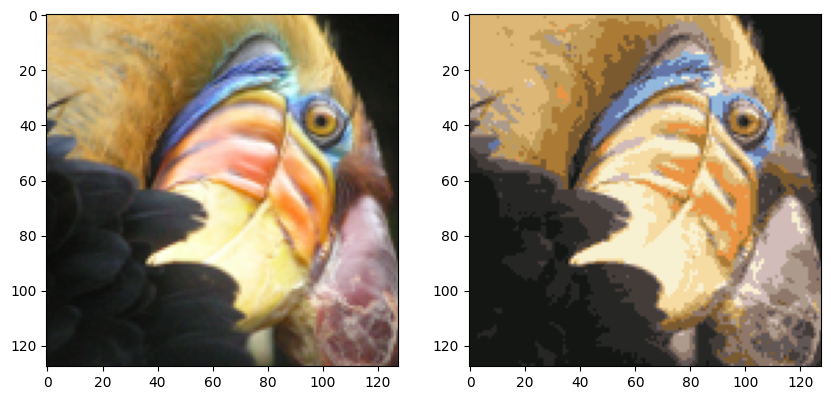

In [34]:
def plotImage(img_array, size):
    fig = plt.figure(figsize=(10, 8))
    ax = fig.add_subplot(1, 2, 1)
    ax.imshow(image)
    ax = fig.add_subplot(1, 2, 2)
    ax.imshow(np.array(img_array / 255).reshape(*size))
    plt.axis('on')
    plt.show()

plotImage(new_pixels, new_pixels.shape)

In [45]:
j=imageByteSize(new_pixels)
j

8.9931640625

In [46]:
k=imageByteSize(image)
k

32.396484375

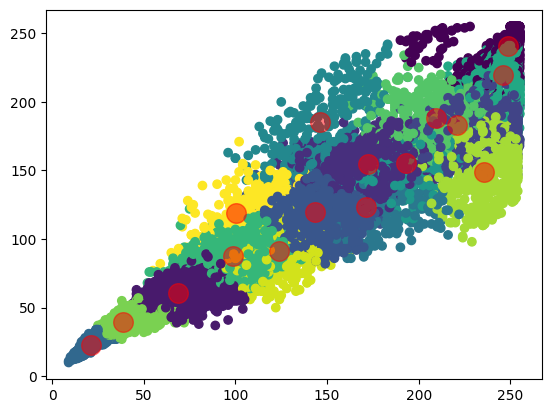

In [61]:
labels = kmeans.labels_
plt.scatter(X[:, 0],X[:, 1], c=labels, cmap='viridis')
centres=kmeans.cluster_centers_
plt.scatter(centres[:, 0], centres[:, 1], c='red', s=200, alpha=0.5);

plt.show()